In [3]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from yellowbrick.cluster import KElbowVisualizer

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


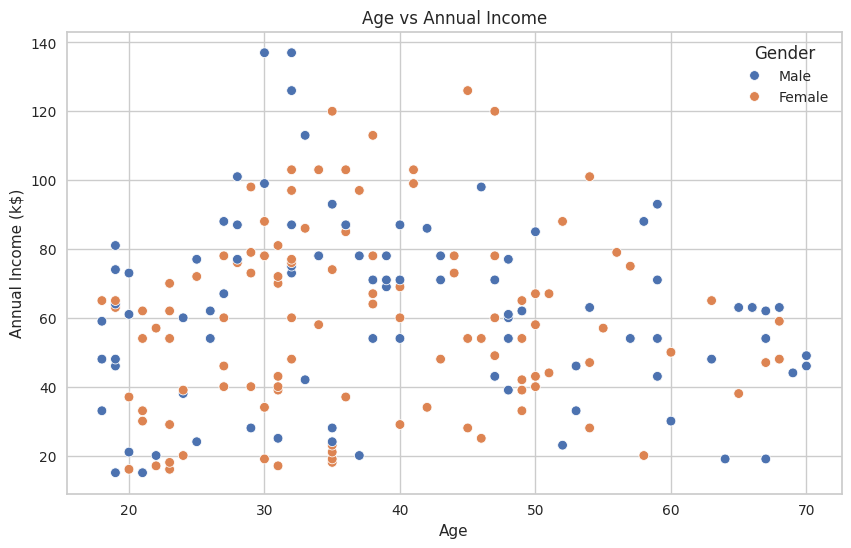

In [25]:
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender', palette='deep')
plt.title('Age vs Annual Income')
plt.show()

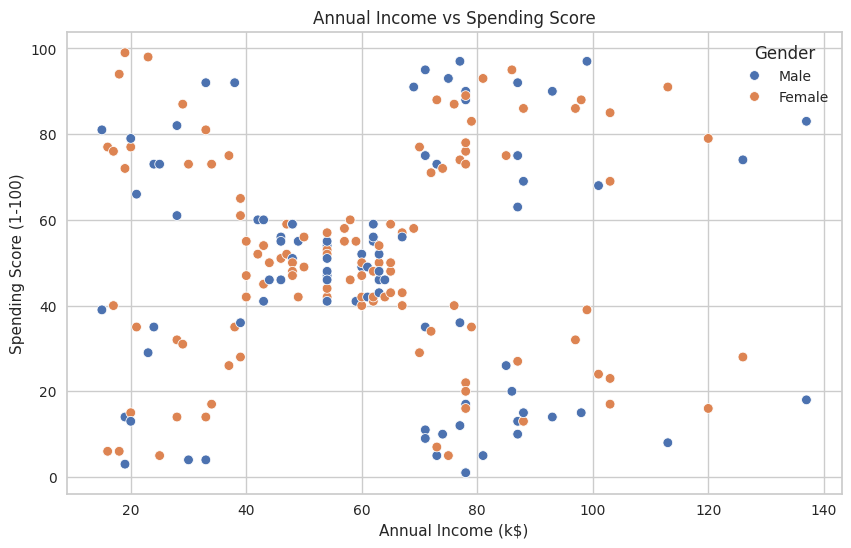

In [24]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender', palette='deep')
plt.title('Annual Income vs Spending Score')
plt.show()

In [7]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
X

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


In [8]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Elbow Method to Find K

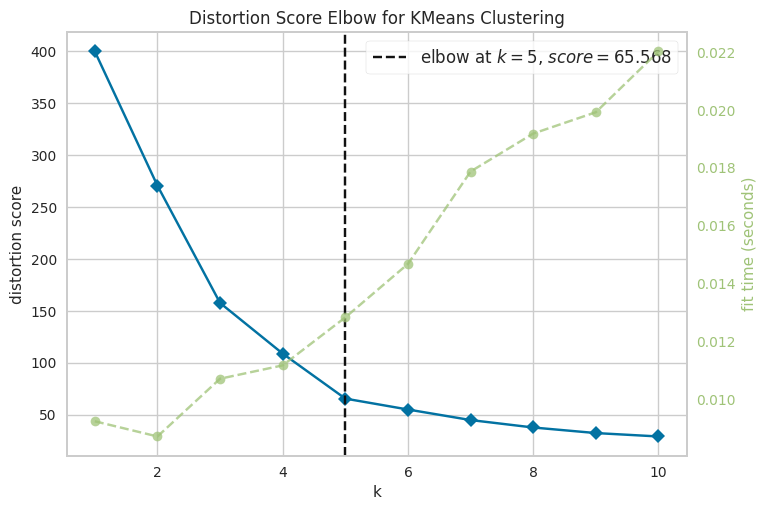

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [26]:
model = KMeans(init='k-means++', max_iter=300, n_init=10, random_state=42)
visualizer = KElbowVisualizer(model, k=(1,11))

visualizer.fit(X_scaled)
visualizer.show()

# K-means


In [10]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)

In [15]:
df['Cluster'] = y_kmeans
df['Cluster'] = df['Cluster'] + 1

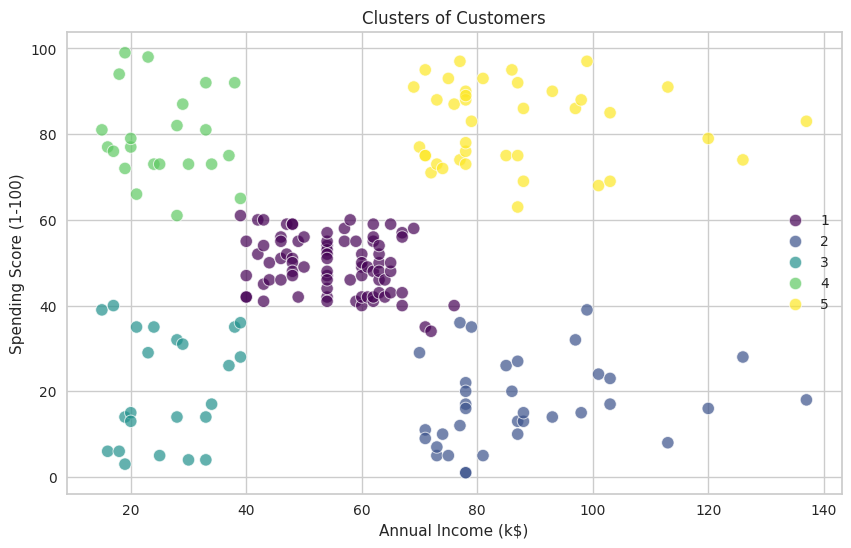

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='viridis', s=80, alpha=0.7)
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()